In [2]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.3 MB/s eta 0:00:00


In [3]:
import yfinance as yf
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import matplotlib.pyplot as plt

# Your financial data fetching and portfolio optimization code here

# Comment out or remove any Seaborn-related code for now

# Your plotting code here

# Show the plot
plt.show()

In [4]:
start_date = '2013-01-01'
end_date = '2022-4-17'

tickers = ['MA', 'META', 'V', 'AMZN', 'JPM', 'BA']
#stocks_df = DataReader(tickers, 'yahoo', start = start_date, end = end_date)['Adj Close']
stocks_df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
stocks_df.head()


[*********************100%%**********************]  6 of 6 completed


Ticker,AMZN,BA,JPM,MA,META,V
Date,,,,,,
2013-01-02,12.8655,64.583855,32.882107,47.732334,28.000000,35.941452
2013-01-03,12.9240,64.919060,32.815838,47.800617,27.770000,35.969215
2013-01-04,12.9575,65.103409,33.397499,47.798756,28.760000,36.262970
2013-01-07,13.4230,63.796143,33.434303,48.627087,29.420000,36.522045
2013-01-08,13.3190,62.120159,33.500580,48.467037,29.059999,36.862080


In [5]:


import seaborn
import plotly.express as px
fig_price = px.line(stocks_df, title='Price of Individual Stocks')
fig_price.show()



In [7]:


daily_returns = stocks_df.pct_change().dropna()
daily_returns.head()



Ticker,AMZN,BA,JPM,MA,META,V
Date,,,,,,
2013-01-03,0.004547,0.005190,-0.002015,0.001431,-0.008214,0.000772
2013-01-04,0.002592,0.002840,0.017725,-0.000039,0.035650,0.008167
2013-01-07,0.035925,-0.020080,0.001102,0.017330,0.022949,0.007144
2013-01-08,-0.007748,-0.026271,0.001982,-0.003291,-0.012237,0.009310
2013-01-09,-0.000113,0.035478,-0.000659,0.028137,0.052650,0.015249


In [8]:


fig = px.line(daily_returns[['BA', 'V']], title='Daily Returns')
fig.show()



In [9]:
daily_returns.std()


Ticker
AMZN    0.019330
BA      0.023948
JPM     0.016772
MA      0.017019
META    0.022239
V       0.015621
dtype: float64

(-0.1, 0.1)

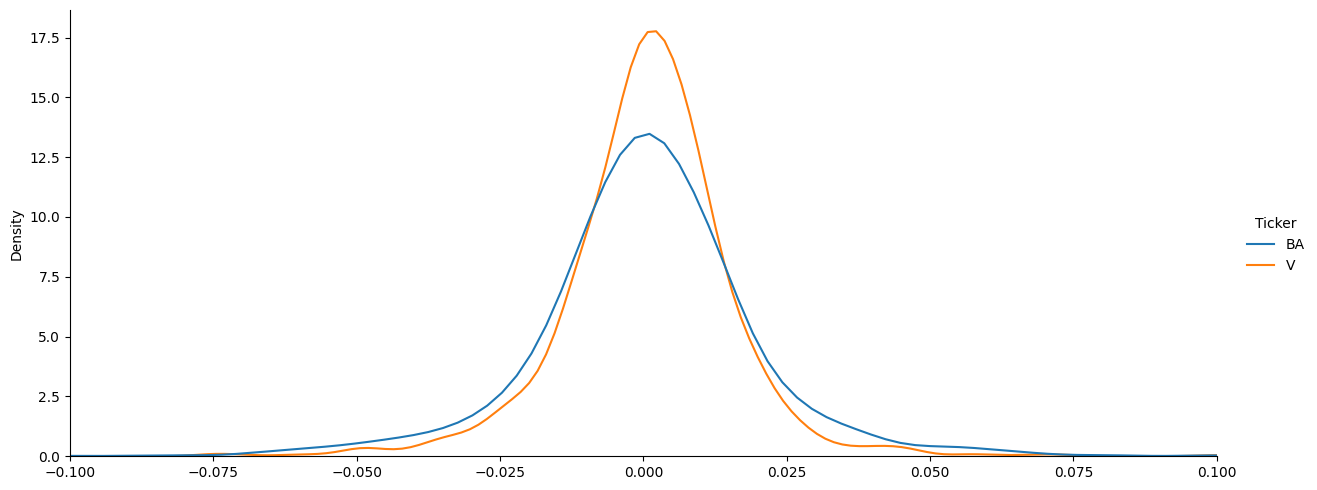

In [10]:


import seaborn as sns
sns.displot(data=daily_returns[['BA', 'V']], kind = 'kde', aspect = 2.5)
plt.xlim(-0.1, 0.1)



In [11]:


def plot_cum_returns(data, title):
    daily_cum_returns = (1 + daily_returns).cumprod()*100
    fig = px.line(daily_cum_returns, title=title)
    return fig

fig_cum_returns = plot_cum_returns(stocks_df, 'Cumulative Returns of Individual Stocks Starting with $100')
fig_cum_returns.show()



In [12]:


corr_df = stocks_df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Stocks')
fig_corr.show()



In [13]:


# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(stocks_df)
S = risk_models.sample_cov(stocks_df)

print(mu)



Ticker
AMZN    0.304666
BA      0.118103
JPM     0.149305
MA      0.241052
META    0.242676
V       0.209486
dtype: float64


In [14]:


ef = EfficientFrontier(mu, S)
ef.max_sharpe(risk_free_rate=0.02)
weights = ef.clean_weights()
print(weights)



OrderedDict([('AMZN', 0.52723), ('BA', 0.0), ('JPM', 0.0), ('MA', 0.35912), ('META', 0.03502), ('V', 0.07864)])


In [15]:
import pandas as pd
weights_df = pd.DataFrame.from_dict(weights, orient = 'index')
weights_df.columns = ['weights']
weights_df

,weights
AMZN,0.52723
BA,0.00000
JPM,0.00000
MA,0.35912
META,0.03502
V,0.07864


In [16]:


expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance()

print('Expected annual return: {}%'.format((expected_annual_return*100).round(2)))
print('Annual volatility: {}%'.format((annual_volatility*100).round(2)))
print('Sharpe ratio: {}'.format(sharpe_ratio.round(2)))



Expected annual return: 27.22%
Annual volatility: 24.67%
Sharpe ratio: 1.02


In [17]:


stocks_df['Optimized Portfolio'] = 0

for ticker, weight in weights.items():
    stocks_df['Optimized Portfolio'] += stocks_df[ticker]*weight

stocks_df.head()



Ticker,AMZN,BA,JPM,MA,META,V,Optimized Portfolio
Date,,,,,,,
2013-01-02,12.8655,64.583855,32.882107,47.732334,28.000000,35.941452,27.731709
2013-01-03,12.9240,64.919060,32.815838,47.800617,27.770000,35.969215,27.781203
2013-01-04,12.9575,65.103409,33.397499,47.798756,28.760000,36.262970,27.855967
2013-01-07,13.4230,63.796143,33.434303,48.627087,29.420000,36.522045,28.442350
2013-01-08,13.3190,62.120159,33.500580,48.467037,29.059999,36.862080,28.344174


In [18]:


fig_cum_returns_optimized = plot_cum_returns(stocks_df['Optimized Portfolio'], 'Cumulative Returns of Optimized Portfolio Starting with $100')
fig_cum_returns_optimized.show()

